In [13]:
# <img width=200, height=200 src="./iris.png"/>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.shape

(150, 5)

In [17]:
df.target.unique()

array([0, 1, 2])

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

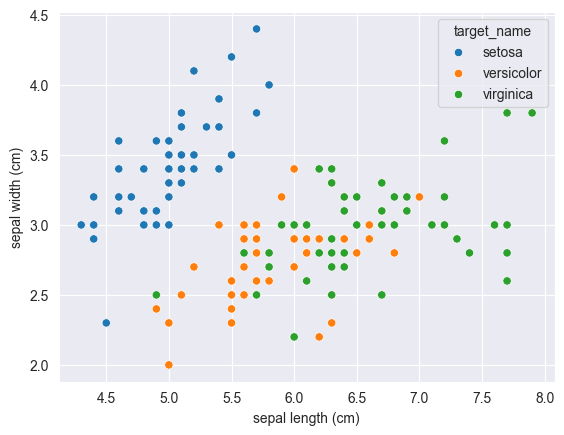

In [20]:
sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="target_name")
plt.show()

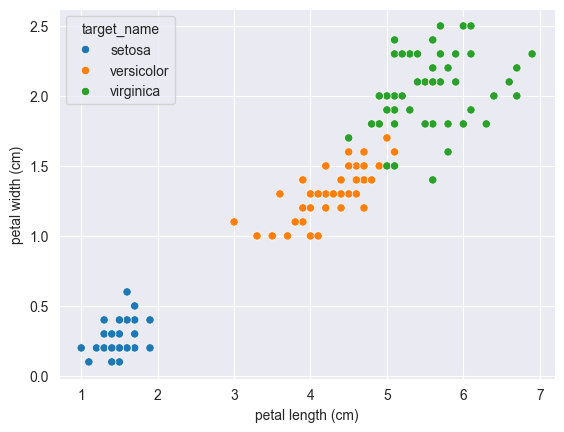

In [21]:
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="target_name")
plt.show()

In [22]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["target"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [25]:
model.score(X_test, y_test)

0.9777777777777777

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [28]:
accuracy_score(y_test, y_pred)

0.9777777777777777

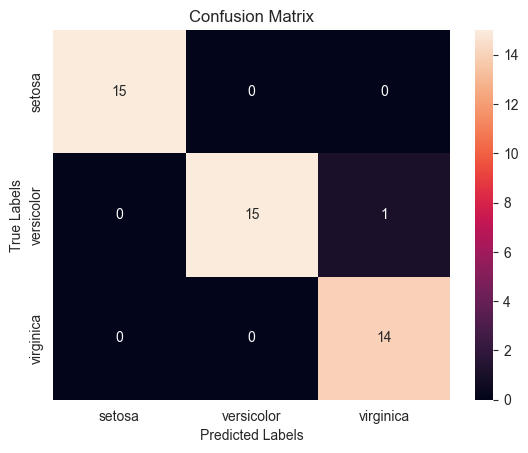

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
df = pd.read_excel("dry_bean_dataset.xlsx")

df.head()

,area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor1,shape_factor2,shape_factor3,shape_factor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [31]:
df.shape

(13611, 17)

In [32]:
df.isna().sum()

area                 0
perimeter            0
major_axis_length    0
minor_axis_length    0
aspect_ratio         0
eccentricity         0
convex_area          0
equiv_diameter       0
extent               0
solidity             0
roundness            0
compactness          0
shape_factor1        0
shape_factor2        0
shape_factor3        0
shape_factor4        0
class                0
dtype: int64

In [33]:
df['class'].value_counts()

class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

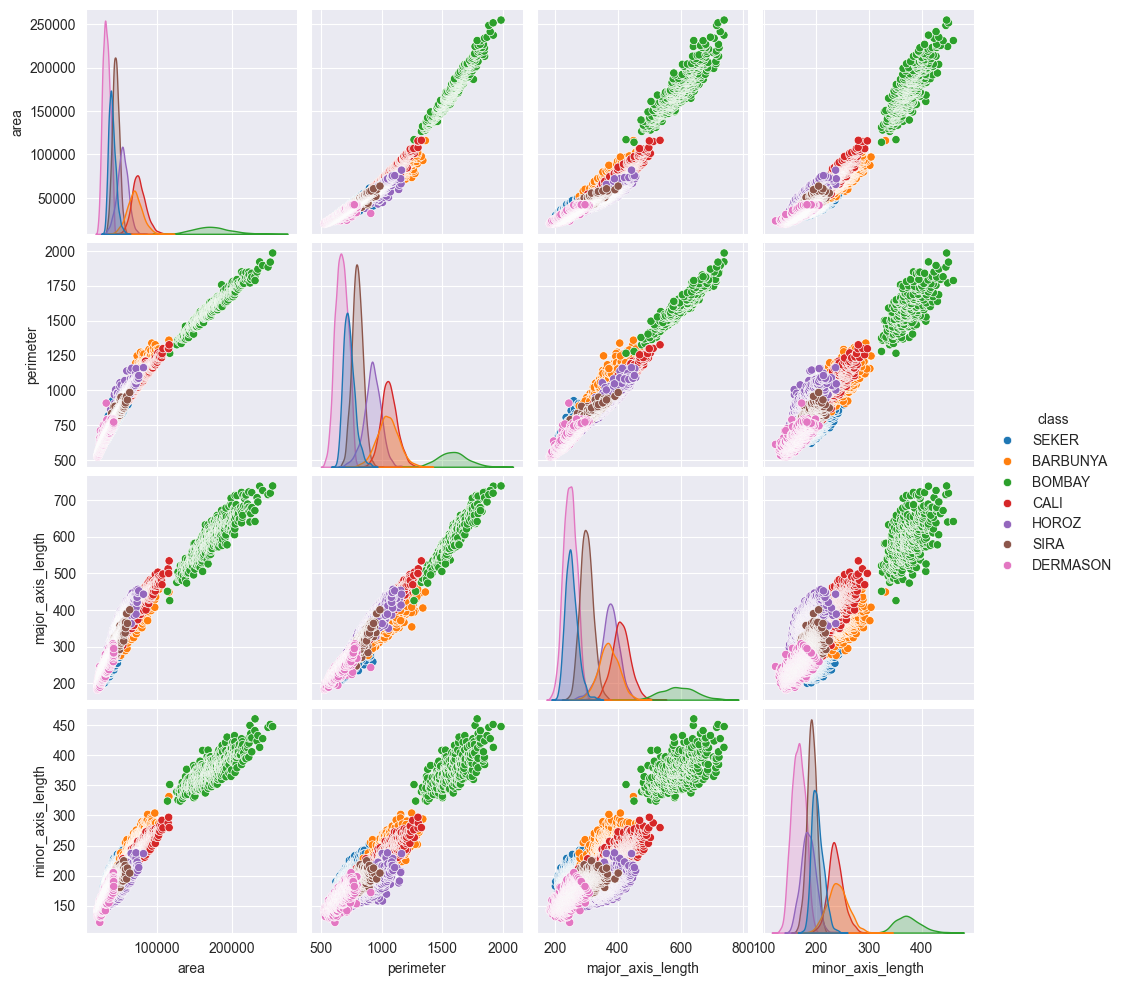

In [34]:
sns.pairplot(df, vars=["area", "perimeter", "major_axis_length", "minor_axis_length"], hue="class")
plt.show()

In [35]:
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array(['SEKER', 'HOROZ', 'SEKER', ..., 'SIRA', 'SEKER', 'HOROZ'],
      shape=(4084,), dtype=object)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

    BARBUNYA       0.63      0.55      0.59       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.70      0.71      0.71       479
    DERMASON       0.81      0.86      0.83      1043
       HOROZ       0.65      0.59      0.62       588
       SEKER       0.67      0.63      0.65       619
        SIRA       0.60      0.66      0.63       799

    accuracy                           0.71      4084
   macro avg       0.72      0.71      0.72      4084
weighted avg       0.70      0.71      0.70      4084



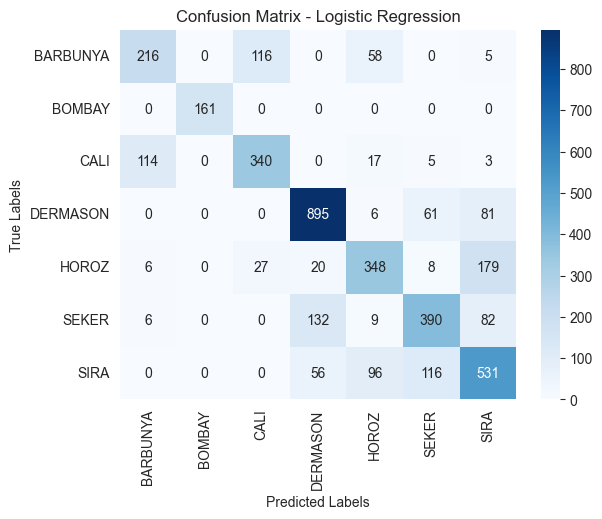

In [41]:
classes = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [42]:
lr_params = {
    'max_iter': 300,
    'C': 0.5,
    'tol': 0.001,
    'class_weight': 'balanced',
}

lr_model_custom = LogisticRegression(**lr_params)
lr_model_custom.fit(X_train, y_train)

y_pred_lr_custom = lr_model_custom.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
print(classification_report(y_test, y_pred_lr_custom))

              precision    recall  f1-score   support

    BARBUNYA       0.84      0.82      0.83       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.86      0.89      0.87       479
    DERMASON       0.87      0.81      0.84      1043
       HOROZ       0.87      0.85      0.86       588
       SEKER       0.70      0.82      0.75       619
        SIRA       0.79      0.76      0.78       799

    accuracy                           0.83      4084
   macro avg       0.85      0.85      0.85      4084
weighted avg       0.83      0.83      0.83      4084



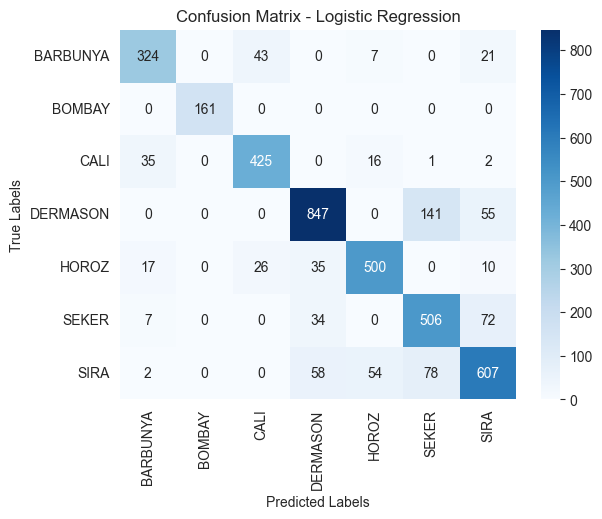

In [47]:
classes = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
cm_lr_custom = confusion_matrix(y_test, y_pred_lr_custom)
sns.heatmap(cm_lr_custom, annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()